In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline, f_decline_R50, f_decline_R75, f_decline_R100, f_decline_mixed
from MaaSSim.acceptance import RA_kpi_veh, RA_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
import folium
import h3

In [18]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 180 #in second 600
params.dist_threshold = 20000 #in meter
params.dist_threshold_min = 3000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.d2d.fuel_cost = 0.25 #euro/km
params.platforms.comm_rate = 0
params.platforms.base_fare = 2
params.platforms.fare = 1.2 
params.platforms.min_fare = 2
params.speeds.ride=10
params.times.decline=20
params.assert_me = False

params.paths.requests = 'Amsterdam_requests_new.csv'
params.dynamic_paricing = 'On'
params.zoning_level = 6
params.seed = 1

params.nP = 10000
params.nV = 200
params.start_time = pd.Timestamp('1900-01-01 08:00:00')
params.simTime = 8
params.end_time = params.start_time + pd.Timedelta(int(params.simTime), 'h')
# params.end_time = pd.Timestamp('1900-01-01 16:00:00')


pd.set_option('display.max_rows', 100)

In [10]:
sim200_surge_17 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

07-10-22 14:40:05-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 200 vehicles and 10000 passengers in Amsterdam, Netherlands
07-10-22 14:40:22-INFO--------------------	Starting simulation	-------------------
07-10-22 14:40:29-WARNING-pax   79  got rejected by vehicle 5                1900-01-01 08:01:00
07-10-22 14:40:29-WARNING-pax 9350  got rejected by vehicle 7                1900-01-01 08:01:00
07-10-22 14:40:30-WARNING-pax 4106  got rejected by vehicle 20               1900-01-01 08:01:00
07-10-22 14:40:30-WARNING-pax 8486  got rejected by vehicle 23               1900-01-01 08:01:00
07-10-22 14:40:30-WARNING-pax 8116  got rejected by vehicle 25               1900-01-01 08:01:00
07-10-22 14:40:43-WARNING-pax   79  got rejected by vehicle 183              1900-01-01 08:01:30
07-10-22 14:40:43-WARNING-pax 9350  got rejected by vehicle 76               1900-01-01 08:01:30
07-10-22 14:40:45-WARNING-pax 1648  got rejected by vehicle 84               1900-01-01 08:02:00
07-

In [23]:
sim200_surge_16 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

07-10-22 15:17:19-WARNING-Setting up 8h simulation at 1900-01-01 08:01:00 for 200 vehicles and 10000 passengers in Amsterdam, Netherlands
07-10-22 15:17:35-INFO--------------------	Starting simulation	-------------------
07-10-22 15:17:43-WARNING-pax  254  got rejected by vehicle 2                1900-01-01 08:01:00
07-10-22 15:17:43-WARNING-pax  577  got rejected by vehicle 4                1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 2428  got rejected by vehicle 8                1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 2498  got rejected by vehicle 10               1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 7914  got rejected by vehicle 18               1900-01-01 08:01:00
07-10-22 15:17:44-WARNING-pax 3719  got rejected by vehicle 26               1900-01-01 08:01:00
07-10-22 15:18:01-WARNING-pax 3719  got rejected by vehicle 67               1900-01-01 08:01:30
07-10-22 15:18:01-WARNING-pax  413  got rejected by vehicle 180              1900-01-01 08:02:00
07-

In [57]:
surge_table = pd.DataFrame(columns=['veh_id', 'n_surge = 0', 'n_surge = 1', 'n_surge = 2', 'n_surge = 3'])
surge_table.veh_id = [i for i in range(1,params.nV)]
surge_table.set_index('veh_id', inplace=True)

for fee in range(0,4):
    surge_table['n_surge = {}'.format(fee)] = surge_table.apply(lambda row: sim200_surge_17.vehs[row.name].surge_fees.count(fee)
                                                 , axis=1)
surge_table['total_n_surges'] = surge_table.apply(lambda row: row['n_surge = 0']+row['n_surge = 1']+
row['n_surge = 2']+row['n_surge = 3'], axis=1)

for fee in range(0,4):
    print('percentage of surge {} = '.format(fee),100*surge_table['n_surge = {}'.format(fee)].sum()/
          surge_table['total_n_surges'].sum())
print('======================================================')   
surge_table

percentage of surge 0 =  47.4973047897736
percentage of surge 1 =  41.15200985676883
percentage of surge 2 =  9.394732789157555
percentage of surge 3 =  1.9559525643000153


,n_surge = 0,n_surge = 1,n_surge = 2,n_surge = 3,total_n_surges
veh_id,,,,,
1,14,14,6,0,34
2,16,13,2,1,32
3,15,11,6,0,32
4,19,11,3,2,35
5,14,14,5,0,33
...,...,...,...,...,...
195,17,14,2,0,33
196,15,13,1,0,29
197,14,18,1,0,33


<AxesSubplot:xlabel='total_n_surges', ylabel='Count'>

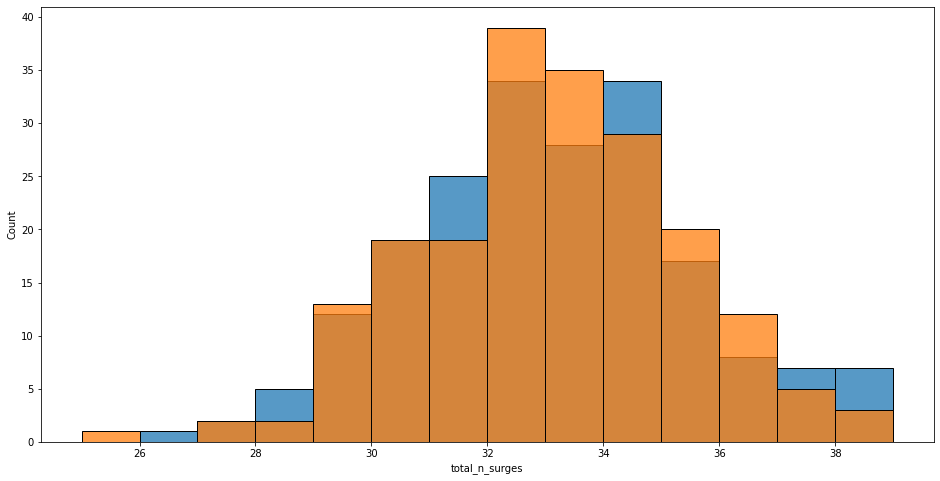

In [67]:
fig, ax = plt.subplots(ncols=1,figsize=(16,8))

sns.histplot(t1.total_n_surges, label='Zoning level 6')
sns.histplot(t2.total_n_surges, label='Zoning level 7')


In [58]:
t2 = surge_table

In [24]:
df = sim200_surge_16.res[0].pax_kpi
df.to_csv('pax_kpi_2006.csv')
df

,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE,nP
sum,2.519473e+06,1192.000000,3.729653e+06,3474.000000,10000
mean,2.519473e+02,0.119200,3.729653e+02,0.347400,10000
std,1.920319e+02,0.368789,3.303865e+02,0.476168,10000


In [25]:
df = sim200_surge_16.res[0].pax_exp
df.to_csv('pax_exp_2006.csv')
df

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,552.0,250.0,0.0,354.0,False
1,Unfulfilled,195.0,0.0,0.0,True
2,Unfulfilled,195.0,0.0,0.0,True
3,336.0,328.0,0.0,686.0,False
4,Unfulfilled,195.0,0.0,0.0,True
...,...,...,...,...,...
9995,148.0,221.0,0.0,423.0,False
9996,Unfulfilled,195.0,0.0,0.0,True
9997,636.0,619.0,0.0,576.0,False


In [26]:
df = sim200_surge_16.res[0].veh_kpi
df.to_csv('veh_kpi_2006.csv')
df

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR,nV
sum,16854.855243,51109.271000,6388.658875,165746.000000,7771.000000,6526.000000,1245.000000,52238.260000,1610.74605,5.223826e+06,462.952197,1147.793854,64168.836000,6361.000000,8021.104500,13059.565000,63743.000000,80-9070-8080-9090-10090-10080-9070-8080-9080-9...,200
mean,84.274276,255.546355,31.943294,828.730000,38.855000,32.630000,6.225000,261.191300,8.05373,2.611913e+04,2.314761,5.738969,320.844180,31.805000,40.105522,65.297825,318.715000,NaN,200
std,5.767579,16.500837,2.062605,246.480344,3.486366,2.466479,2.632303,4.494591,0.66874,4.494591e+02,0.409772,0.407075,16.431362,4.664306,2.053920,1.123648,180.380764,NaN,200


In [27]:
df = sim200_surge_16.res[0].veh_exp
df.to_csv('veh_exp_2006.csv')
df

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,surge_fee,REVENUE/hour,COST,IMPOSED_DELAY,AR
veh,,,,,,,,,,,,,,,,,,
1,82.500000,262.5120,32.814000,835.0,40,33,7.0,263.04,7.970909,26304.0,2.181212,5.789697,328.272,33,41.0340,65.7600,314,80-90
2,78.571429,260.7265,32.590812,697.0,42,33,9.0,260.39,7.890606,26039.0,2.162727,5.727879,325.824,33,40.7280,65.0975,633,70-80
3,86.486486,240.0980,30.012250,512.0,37,32,5.0,262.84,8.213750,26284.0,2.671875,5.541875,305.808,29,38.2260,65.7100,159,80-90
4,97.297297,279.3365,34.917063,799.0,37,36,1.0,260.59,7.238611,26059.0,1.625556,5.613056,344.484,30,43.0605,65.1475,15,90-100
5,94.117647,261.7360,32.717000,371.0,34,32,2.0,265.84,8.307500,26584.0,2.312813,5.994688,328.196,34,41.0245,66.4600,173,90-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,80.952381,254.4570,31.807125,1323.0,42,34,8.0,252.94,7.439412,25294.0,2.103824,5.335588,317.692,32,39.7115,63.2350,456,80-90
197,73.333333,246.8465,30.855812,799.0,45,33,12.0,259.03,7.849394,25903.0,2.480606,5.368788,311.604,33,38.9505,64.7575,370,70-80
198,79.069767,261.6245,32.703063,1542.0,43,34,9.0,251.31,7.391471,25131.0,1.841176,5.550294,324.452,30,40.5565,62.8275,445,70-80


<AxesSubplot:xlabel='WAIT_TIME', ylabel='Count'>

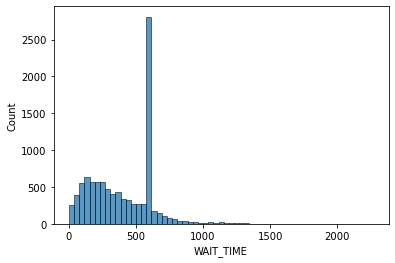

In [224]:
sns.histplot(pax.WAIT_TIME)

In [20]:
surge_list = []
for veh in range(1,params.nV+1):
    
    surge_list = surge_list + sim200_surge_17.vehs[veh].surge_fees
    
surge_list

[0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 2,


In [22]:
for i in surge_list:
    if i>2:
        print(i)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [ ]:
max_ds = 

math.ceil((3/(max_ds-1))*ds - (3/(max_ds-1)))

In [202]:
sim200.vehs

{1: <MaaSSim.driver.VehicleAgent at 0x1bf60359d00>,
 2: <MaaSSim.driver.VehicleAgent at 0x1c15a73c610>,
 3: <MaaSSim.driver.VehicleAgent at 0x1c15a73c0d0>,
 4: <MaaSSim.driver.VehicleAgent at 0x1c1564474c0>,
 5: <MaaSSim.driver.VehicleAgent at 0x1c156447910>,
 6: <MaaSSim.driver.VehicleAgent at 0x1c156447d60>,
 7: <MaaSSim.driver.VehicleAgent at 0x1c1564458e0>,
 8: <MaaSSim.driver.VehicleAgent at 0x1c156445a30>,
 9: <MaaSSim.driver.VehicleAgent at 0x1c1564456d0>,
 10: <MaaSSim.driver.VehicleAgent at 0x1c156445100>,
 11: <MaaSSim.driver.VehicleAgent at 0x1c15645bd90>,
 12: <MaaSSim.driver.VehicleAgent at 0x1c15645b970>,
 13: <MaaSSim.driver.VehicleAgent at 0x1c15645b370>,
 14: <MaaSSim.driver.VehicleAgent at 0x1c1564290d0>,
 15: <MaaSSim.driver.VehicleAgent at 0x1c1564294f0>,
 16: <MaaSSim.driver.VehicleAgent at 0x1c156429940>,
 17: <MaaSSim.driver.VehicleAgent at 0x1c156429d90>,
 18: <MaaSSim.driver.VehicleAgent at 0x1c156421d90>,
 19: <MaaSSim.driver.VehicleAgent at 0x1c156421af0>,
 2

In [209]:
max_ds = 60
ds = 45
math.ceil((3/(max_ds-1))*ds - (3/(max_ds-1)))

3

In [229]:
sim200_1.concat_sdf

,hex_address,cnt,demand,supply,D/S,surge_mp
0,871968240ffffff,11,0,0,0.0,0
1,871968241ffffff,12,0,0,0.0,0
2,871968244ffffff,12,0,0,0.0,0
3,871968245ffffff,30,0,0,0.0,0
4,871968248ffffff,34,0,0,0.0,0
...,...,...,...,...,...,...
50,871969c9effffff,536,0,3,0.0,0
51,871969cabffffff,5,0,0,0.0,0
52,871969cd0ffffff,95,0,0,0.0,0
53,871969cd2ffffff,13,0,0,0.0,0


In [46]:
sims = [sim200_16, sim200_26, sim200_36, sim200_46, sim200_56]
# sims = [sim200_1, sim200_2, sim200_3, sim200_4, sim200_5]

df = pd.DataFrame(index=sims[0].concat_sdf.groupby(['hex_address']).max().index)

for i in range(1,len(sims)+1):
    df['sim{}'.format(i)] = sims[i-1].concat_sdf.groupby(['hex_address']).max()['D/S']
    
df['ave_max'] = df.mean(axis=1)
print(df.ave_max.mean())
df.to_csv('max_ds_dfl6.csv')
# df.to_csv('max_ds_dfl7.csv')
df

15.700000000000001


,sim1,sim2,sim3,sim4,sim5,ave_max
hex_address,,,,,,
861968247ffffff,2.0,4.0,2.0,2.0,2.0,2.4
86196824fffffff,12.0,11.0,13.0,11.0,11.0,11.6
861968267ffffff,1.0,0.0,0.0,0.0,0.0,0.2
86196826fffffff,25.0,20.0,17.0,17.0,18.0,19.4
861969507ffffff,11.0,11.0,12.0,6.0,9.0,9.8
861969517ffffff,1.0,2.0,2.0,2.0,2.0,1.8
861969527ffffff,56.0,47.0,56.0,45.0,61.0,53.0
861969537ffffff,64.0,59.0,58.0,62.0,58.0,60.2
861969c87ffffff,4.0,4.0,2.0,2.0,2.0,2.8


In [43]:
def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [3]:
G = sim200.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

NameError: name 'sim200' is not defined

In [1]:
# Visualiziation of hexagons on Amsterdam map
lat = []
lng = []
for i in G.nodes:
    lat.append(G.nodes[i]['y'])
    lng.append(G.nodes[i]['x'])
    
df = pd.DataFrame()
df['lat'] = lat
df['lng'] = lng

level = 7
hex_col = 'hex'+str(level)
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,level),axis=1)
df = df.groupby(hex_col).size().to_frame('cnt').reset_index()

l = list(df[hex_col])
m = visualize_hexagons(l)
display(m)

NameError: name 'G' is not defined

In [46]:
hex_address = ['871969c9bffffff']
# hex_address = f.loc[f.bucket=='acc_above5'].zone.unique()
# hex_address = ['871969c9bffffff', '871969535ffffff', '871969534ffffff', '871969526ffffff', '871969522ffffff']
m = visualize_hexagons(hex_address)
display(m)

In [159]:
f['val'] = 1
f.loc[f.bucket=='acc_above5'].groupby(['zone']).sum()

,request_id,origin,val
zone,,,
87196824dffffff,79259,13712746324,18
871968269ffffff,96289,15456776557,23
87196826bffffff,161326,11258057067,35
871969504ffffff,18119,6374271315,4
871969520ffffff,119612,16973455831,21
871969521ffffff,23269,323739561,7
871969522ffffff,508224,62140210762,100
871969524ffffff,331299,40832056928,63
871969525ffffff,3598,974089157,1


In [ ]:
-------------------------------------------------------------------

In [128]:
x = f.loc[(pd.Timestamp('1900-01-01 08:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 09:00:00'))]
len(x)*100/len(f)

13.945791215672243

In [129]:
x = f.loc[(pd.Timestamp('1900-01-01 09:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 10:00:00'))]
len(x)*100/len(f)

12.86340459790679

In [130]:
x = f.loc[(pd.Timestamp('1900-01-01 10:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 11:00:00'))]
len(x)*100/len(f)

9.777260935682976

In [131]:
x = f.loc[(pd.Timestamp('1900-01-01 11:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 12:00:00'))]
len(x)*100/len(f)

12.559262903658645

In [132]:
x = f.loc[(pd.Timestamp('1900-01-01 12:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 13:00:00'))]
len(x)*100/len(f)

9.535736649074156

In [133]:
x = f.loc[(pd.Timestamp('1900-01-01 13:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 14:00:00'))]
len(x)*100/len(f)

13.480633330351552

In [134]:
x = f.loc[(pd.Timestamp('1900-01-01 14:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 15:00:00'))]
len(x)*100/len(f)

12.657661687091869

In [135]:
x = f.loc[(pd.Timestamp('1900-01-01 15:00:00')<f.time) & (f.time<pd.Timestamp('1900-01-01 16:00:00'))]
len(x)*100/len(f)

14.384113069147508

In [ ]:
=========================================================================

In [147]:
f = pd.read_csv('Amsterdam_requests_new.csv')
f.treq = f.apply(lambda row: pd.Timestamp(row.treq), axis=1)
f

,Unnamed: 0,origin,destination,treq,tarr,ttrav,dist,orig_geo,dest_geo,origin_y,origin_x,destination_y,destination_x,haver_dist
0,0,46343829,5777055555,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,2696,POINT (4.8889728 52.3618803),POINT (4.8947789 52.3796757),52.361880,4.888973,52.379676,4.894779,2017.639692
1,1,1525015196,2020569141,1900-01-01 18:29:00,1900-01-01 18:53:00,0 days 00:24:00.000000000,3489,POINT (4.9062867 52.3591398),POINT (4.8847412 52.3739514),52.359140,4.906287,52.373951,4.884741,2202.841087
2,2,46484989,6219354473,1900-01-01 13:24:00,1900-01-01 13:48:00,0 days 00:24:00.000000000,5152,POINT (4.8663224 52.3934468),POINT (4.8811843 52.4257211),52.393447,4.866322,52.425721,4.881184,3727.642905
3,4,46445391,1732413559,1900-01-01 14:59:00,1900-01-01 15:28:00,0 days 00:29:00.000000000,4787,POINT (4.8225358 52.3841401),POINT (4.7929588 52.3574315),52.384140,4.822536,52.357431,4.792959,3584.982166
4,5,442534817,46453553,1900-01-01 11:30:00,1900-01-01 12:16:00,0 days 00:46:00.000000000,2440,POINT (4.8042997 52.3903223),POINT (4.8330381 52.3859123),52.390322,4.804300,52.385912,4.833038,2010.989249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93291,100316,2101786750,520376452,1900-01-01 13:20:00,1900-01-01 16:01:00,0 days 02:41:00.000000000,3198,POINT (4.8395385 52.345118),POINT (4.8273257 52.3651666),52.345118,4.839538,52.365167,4.827326,2378.601141
93292,100317,30154649,46282361,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,5797,POINT (4.9420068 52.3601681),POINT (4.869708 52.3477848),52.360168,4.942007,52.347785,4.869708,5099.651861
93293,100318,46419807,46330781,1900-01-01 23:02:00,1900-01-01 23:25:00,0 days 00:23:00.000000000,3290,POINT (4.8942334 52.3786703),POINT (4.8928959 52.358953),52.378670,4.894233,52.358953,4.892896,2194.346460
93294,100319,46244835,46519996,1900-01-01 10:06:00,1900-01-01 10:32:00,0 days 00:26:00.000000000,9877,POINT (4.9388043 52.3393751),POINT (4.9167433 52.4049547),52.339375,4.938804,52.404955,4.916743,7444.338424


In [155]:
x = f.loc[(pd.Timestamp('1900-01-01 05:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 06:00:00'))]
len(x)*100/len(f)

0.195078031212485

In [154]:
x = f.loc[(pd.Timestamp('1900-01-01 06:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 07:00:00'))]
len(x)*100/len(f)

2.1480020579660435

In [153]:
x = f.loc[(pd.Timestamp('1900-01-01 07:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 08:00:00'))]
len(x)*100/len(f)

6.143886125878923

In [138]:
x = f.loc[(pd.Timestamp('1900-01-01 08:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 09:00:00'))]
len(x)*100/len(f)

7.489067055393586

In [139]:
x = f.loc[(pd.Timestamp('1900-01-01 09:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 10:00:00'))]
len(x)*100/len(f)

6.275724575544504

In [140]:
x = f.loc[(pd.Timestamp('1900-01-01 10:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 11:00:00'))]
len(x)*100/len(f)

4.505016292231178

In [141]:
x = f.loc[(pd.Timestamp('1900-01-01 11:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 12:00:00'))]
len(x)*100/len(f)

6.27250900360144

In [142]:
x = f.loc[(pd.Timestamp('1900-01-01 12:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 13:00:00'))]
len(x)*100/len(f)

4.966986794717887

In [143]:
x = f.loc[(pd.Timestamp('1900-01-01 13:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 14:00:00'))]
len(x)*100/len(f)

7.662707940318985

In [144]:
x = f.loc[(pd.Timestamp('1900-01-01 14:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 15:00:00'))]
len(x)*100/len(f)

6.207125707425828

In [145]:
x = f.loc[(pd.Timestamp('1900-01-01 15:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 16:00:00'))]
len(x)*100/len(f)

7.664851654947693

In [156]:
x = f.loc[(pd.Timestamp('1900-01-01 16:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 17:00:00'))]
len(x)*100/len(f)

7.908163265306122

In [152]:
x = f.loc[(pd.Timestamp('1900-01-01 17:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 18:00:00'))]
len(x)*100/len(f)

12.357442977190876

In [150]:
x = f.loc[(pd.Timestamp('1900-01-01 18:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 19:00:00'))]
len(x)*100/len(f)

6.728048362202023

In [ ]:
x = f.loc[(pd.Timestamp('1900-01-01 19:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 20:00:00'))]
len(x)*100/len(f)

4.608986451723546

In [149]:
x = f.loc[(pd.Timestamp('1900-01-01 20:00:00')<f.treq) & (f.treq<pd.Timestamp('1900-01-01 21:00:00'))]
len(x)*100/len(f)

2.3613016635225517

In [ ]:
-========================================================================